In [33]:
from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns
sns.set()

from keras.datasets import reuters, imdb
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, LSTM, Dropout, Conv1D, MaxPool1D

### 순환 신경망(RNN, Recurrent Neural Network)
- 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력받은 데이터를 잠시 기억해 놓는 방법 
- 기억된 데이터가 얼마나 중요한지를 판단하여 별도의 가중치를 줘서 다음 데이터로 넘어간다
- 모든 입력 값에 이 작업을 순서대로 실행하므로 다음 층으로 넘어가기 전에 같은 층을 맴도는 것처럼 보인다 그래서 순환 신경망이라고 부른다

### LSTM(Long Shot Term Memory)
- RNN의 특성상 일반 신경망보다 기울기 소실 문제가 더 많이 발생하고 이를 해결하기 어렵다는 단점을 보완한 방법
- 반복되기 직전에 다음 층으로 기억된 값을 넘길지 안 넘길지를 관리하는 단계를 하나 더 추가하는 것

### 로이터 뉴스 카테고리 분류 - LSTM 

In [2]:
# 로이터 뉴스 데이터 불러와 트레인 테스트셋으로 나누기
# 빈도가 1~1000에 해당하는 단어만 불러오기 
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [3]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [4]:
# 패딩 작업
# 단어수를 100개로 맞춘다. 
# 입력된 기사의 단어 수가 100보다 크면 100개째 단어만 선택하고 나머지는 버린다
# 100에서 모자랄 때는 모자라는 부분을 모두 0으로 채운다
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [5]:
# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# 모델 설정
model = Sequential()
# 불러온 단어의 총개수, 기사당 단어 수
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [11]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8982, 100), (2246, 100), (8982, 46), (2246, 46))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         100000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 모델 실행
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=100, epochs=20)

Epoch 1/20
90/90 [==============================] - 24s 240ms/step - loss: 2.9421 - accuracy: 0.3242 - val_loss: 2.3913 - val_accuracy: 0.3620
Epoch 2/20
90/90 [==============================] - 20s 221ms/step - loss: 2.2001 - accuracy: 0.4259 - val_loss: 2.0081 - val_accuracy: 0.4622
Epoch 3/20
90/90 [==============================] - 20s 222ms/step - loss: 1.8829 - accuracy: 0.4985 - val_loss: 1.8475 - val_accuracy: 0.5321
Epoch 4/20
90/90 [==============================] - 20s 221ms/step - loss: 1.7676 - accuracy: 0.5426 - val_loss: 1.7465 - val_accuracy: 0.5552
Epoch 5/20
90/90 [==============================] - 20s 223ms/step - loss: 1.6925 - accuracy: 0.5624 - val_loss: 1.6786 - val_accuracy: 0.5726
Epoch 6/20
90/90 [==============================] - 20s 224ms/step - loss: 1.6033 - accuracy: 0.5807 - val_loss: 1.6810 - val_accuracy: 0.5672
Epoch 7/20
90/90 [==============================] - 20s 222ms/step - loss: 1.5699 - accuracy: 0.6007 - val_loss: 1.5998 - val_accuracy: 0.6002

In [16]:
# 정확도
model.evaluate(x_test, y_test)[1]

71/71 [==============================] - 2s 24ms/step - loss: 1.2367 - accuracy: 0.7075


0.7074799537658691

In [19]:
# 오차값 변수 저장
loss = history.history['loss']
v_loss = history.history['val_loss']

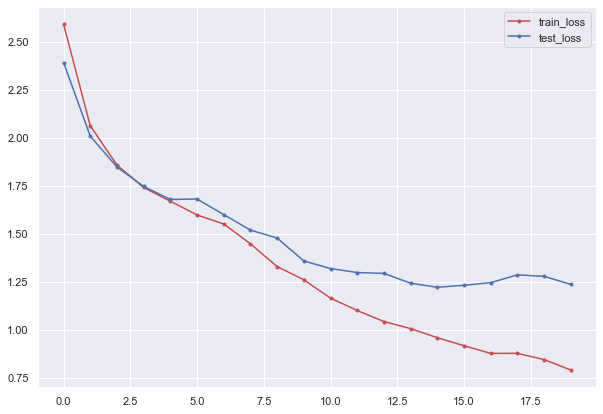

In [23]:
# 오차 시각화
plt.plot(loss, marker='.', c='r', label='train_loss')
plt.plot(v_loss, marker='.', c='b', label='test_loss')
plt.legend()
plt.show()

### 영화 리뷰 분류 - LSTM + CNN

In [26]:
# 영화 리뷰 데이터 불러와 트레인, 테스트셋으로 나누기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

17465344/17464789 [==============================] - 2s 0us/step


In [30]:
# 패딩 작업
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [34]:
# 모델 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPool1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
Total params: 558,520
Trainable params: 558,520
Non-trainable params: 0
________________________________________________

In [36]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [37]:
# 모델 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
250/250 [==============================] - 30s 113ms/step - loss: 0.5684 - accuracy: 0.6612 - val_loss: 0.3418 - val_accuracy: 0.8488
Epoch 2/5
250/250 [==============================] - 28s 111ms/step - loss: 0.2918 - accuracy: 0.8789 - val_loss: 0.3273 - val_accuracy: 0.8552
Epoch 3/5
250/250 [==============================] - 28s 111ms/step - loss: 0.2401 - accuracy: 0.9040 - val_loss: 0.3374 - val_accuracy: 0.8502
Epoch 4/5
250/250 [==============================] - 28s 110ms/step - loss: 0.2046 - accuracy: 0.9188 - val_loss: 0.3367 - val_accuracy: 0.8552
Epoch 5/5
250/250 [==============================] - 28s 111ms/step - loss: 0.1680 - accuracy: 0.9378 - val_loss: 0.3527 - val_accuracy: 0.8540


In [38]:
# 정확도
model.evaluate(x_test, y_test)[1]

782/782 [==============================] - 7s 9ms/step - loss: 0.3527 - accuracy: 0.8540


0.8540400266647339

In [39]:
# 오차값 변수 저장
loss = history.history['loss']
v_loss = history.history['val_loss']

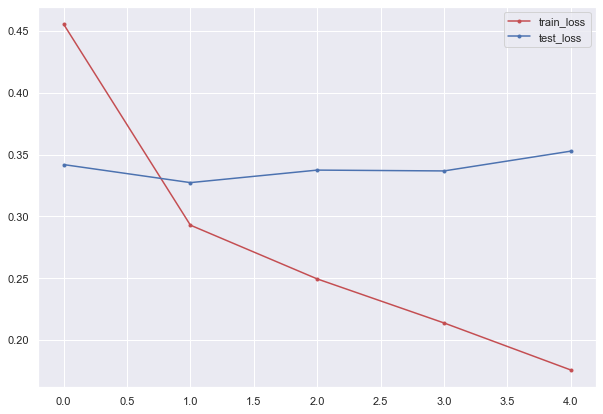

In [40]:
# 오차 시각화
plt.plot(loss, marker='.', c='r', label='train_loss')
plt.plot(v_loss, marker='.', c='b', label='test_loss')
plt.legend()
plt.show()